In [2]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def mre_c(y_real, y_pred):
  mre = np.mean(np.abs((np.array(y_real) - np.array(y_pred)) / (np.array(y_real)+ 0.001)))
  return mre

model = MLPRegressor(hidden_layer_sizes=(20,), activation='relu', solver='sgd', batch_size=2, learning_rate='constant', learning_rate_init=0.001, momentum=0.9, random_state=42)

dataset_q1 = np.genfromtxt('./concrete.csv', delimiter=',')
n_q1, m_q1 = dataset_q1.shape
dataset_q2 = np.genfromtxt('./vowel.csv', delimiter=',')
n_q2, m_q2 = dataset_q2.shape


# Questão 1 | Validação

In [8]:
df = pd.DataFrame(dataset_q1)
df_normalizado = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X = dataset_q1[:,:-1]
y = dataset_q1[:,-1]

X_normalizado = df_normalizado.iloc[:, :-1]
y_normalizado = df_normalizado.iloc[:, -1]

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y_normalizado, test_size=0.2, random_state=42)
X_treino, X_val, y_treino, y_val = train_test_split(X_treino, y_treino, test_size=0.2, random_state=42)
indice = -1
historico_custo = []
with open("validacoes_q1.csv", mode="w", newline="") as arquivo_csv:
  escritor_csv = csv.writer(arquivo_csv)
  escritor_csv.writerow(["Indice", "Qnt_nós", "Ativação", "Alfa", "Taxa aprendizado", "Momentum", "Erro"])
  
  for qnt_nos in [40, 60, 80]:
    for taxa_aprendizado in [0.05, 0.025, 0.01, 0.005]:
      for momentum_ in [0.95, 0.9, 0.8]:
        for ativacao in ["relu", "logistic", "tanh"]:
          for alfa in [0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001, 0]:
            indice += 1
            model = MLPRegressor(hidden_layer_sizes=(qnt_nos,), activation = ativacao, alpha = alfa, solver='sgd', batch_size=6, learning_rate='constant', learning_rate_init= taxa_aprendizado, momentum=momentum_, random_state=42)
            model.fit(X_treino, y_treino)
            y_pred = model.predict(X_val)
            mse = mean_squared_error(y_val, y_pred)
            linha_csv = [indice, qnt_nos, ativacao, alfa, taxa_aprendizado, momentum_, mse]
            escritor_csv.writerow(linha_csv)
            historico_custo.append( model.loss_curve_ )


# Questão 1 | Resultados da validação

     Qnt_nós Ativação     Alfa  Taxa aprendizado  Momentum      Erro
510       80     relu  0.00000             0.050      0.95  0.004676
509       80     relu  0.00001             0.050      0.95  0.004730
256       60     relu  0.00010             0.050      0.95  0.004751
5         40     relu  0.00001             0.050      0.95  0.004757
320       60     relu  0.00001             0.025      0.95  0.004947
25        40     relu  0.00010             0.050      0.90  0.004997
47        40     relu  0.00001             0.050      0.80  0.005024
27        40     relu  0.00000             0.050      0.90  0.005043
48        40     relu  0.00000             0.050      0.80  0.005076
319       60     relu  0.00010             0.025      0.95  0.005284



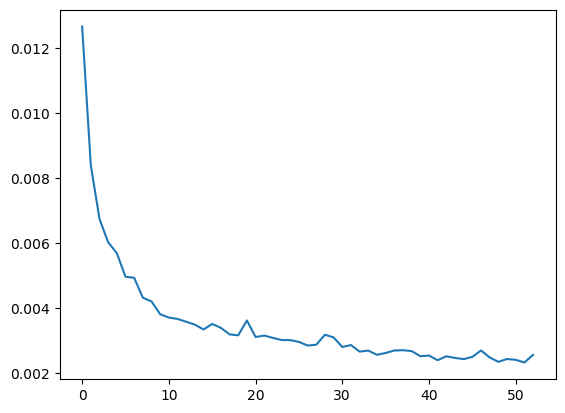


----------- Validação -----------
MSE: 0.00467559785259511
RMSE: 0.0683783434472868
MAE: 0.05131442557827842
MRE: 0.16182955644506655


In [9]:
with open("validacoes_q1.csv", mode="r") as arquivo_csv:
    leitor_csv = csv.reader(arquivo_csv)
    matriz = list(leitor_csv)


nome_colunas = matriz[0]
df = pd.DataFrame(data = matriz[1:], columns = nome_colunas)
df['Indice'] = df['Indice'].astype(int)
df['Alfa'] = df['Alfa'].astype(float)
df['Qnt_nós'] = df['Qnt_nós'].astype(int)
df['Taxa aprendizado'] = df['Taxa aprendizado'].astype(float)
df['Momentum'] = df['Momentum'].astype(float)
df['Erro'] = df['Erro'].astype(float)
df_ordenado = df.sort_values(by='Erro')

print(df_ordenado.iloc[:,1:].head(10))
print()
melhor_hiperparametros = df_ordenado.iloc[0]
melhor_curva = historico_custo[ int(melhor_hiperparametros[0]) ]
n_it = len(melhor_curva)
x = range(n_it)
plt.plot(x, melhor_curva)
plt.show()
print()

_ , qnt_nos, ativacao, alfa, taxa_aprendizado, momentum_, _ = melhor_hiperparametros
model = MLPRegressor(hidden_layer_sizes=(qnt_nos,), activation=ativacao, alpha = alfa, solver='sgd', batch_size=6, learning_rate='constant', learning_rate_init= taxa_aprendizado, momentum=momentum_, random_state=42)
model.fit(X_treino, y_treino)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
mre = mre_c(y_val, y_pred)
print("----------- Validação -----------")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MRE:", mre)

# Questão 1 | Treinamento e Teste

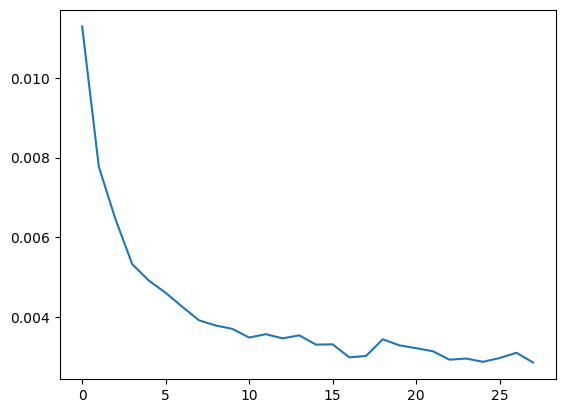


----------- Treino -----------
MSE: 0.005843297549435341
RMSE: 0.07644146485668195
MAE: 0.06017662189696214
MRE: 0.24763244311798105
----------- Teste -----------
MSE: 0.006320206671408205
RMSE: 0.07949972749266632
MAE: 0.06229630032901479
MRE: 0.1895123471663473


In [10]:
X_treinoval = np.concatenate((X_treino, X_val), axis=0)
y_treinoval = np.concatenate((y_treino, y_val), axis=0)


model = MLPRegressor(hidden_layer_sizes=(qnt_nos,), activation=ativacao, alpha = alfa, solver='sgd', batch_size=6, learning_rate='constant', learning_rate_init= taxa_aprendizado, momentum=momentum_, random_state=42)
model.fit(X_treinoval, y_treinoval)
for tipo, x, y in [ ["Treino", X_treinoval, y_treinoval], ["Teste", X_teste, y_teste] ]:
  y_pred = model.predict(x)
  mse = mean_squared_error(y, y_pred)
  rmse = math.sqrt(mse)
  mae = mean_absolute_error(y, y_pred)
  mre = mre_c(y, y_pred)

  if tipo == "Treino":
    curva = model.loss_curve_
    n_it = len(curva)
    x = range(n_it)
    plt.plot(x, curva)
    plt.show()
    print()

  print("-----------",tipo,"-----------")
  print("MSE:", mse)
  print("RMSE:", rmse)
  print("MAE:", mae)
  print("MRE:", mre)

# Questão 2 | Validação

In [3]:
df = pd.DataFrame(dataset_q2)
df_normalizado = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X = dataset_q2[:,:-1]
y = dataset_q2[:,-1]

X_normalizado = df_normalizado.iloc[:, :-1]
y_normalizado = df_normalizado.iloc[:, -1]*10



X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y_normalizado, test_size=0.2, random_state=42)
X_treino, X_val, y_treino, y_val = train_test_split(X_treino, y_treino, test_size=0.2, random_state=42)
indice = -1
historico_custo = []
with open("validacoes_q2.csv", mode="w", newline="") as arquivo_csv:
  escritor_csv = csv.writer(arquivo_csv)
  escritor_csv.writerow(["Indice", "Qnt_nós", "Ativação", "Alfa", "Taxa aprendizado", "Momentum", "Erro"])
  
  for qnt_nos in [50, 65, 80]:
    for taxa_aprendizado in [0.1, 0.05, 0.01]:
      for momentum_ in [0.95, 0.9, 0.85]:
        for ativacao in ["relu", "logistic", "tanh"]:
          for alfa in [0.01, 0.005, 0.001, 0.0005]:
            indice += 1
            model = MLPClassifier(hidden_layer_sizes=(qnt_nos,), activation = ativacao, alpha = alfa, solver='sgd', batch_size=6, learning_rate='constant', learning_rate_init= taxa_aprendizado, momentum=momentum_, random_state=42)
            model.fit(X_treino, y_treino)
            y_pred = model.predict(X_val)
            mse = mean_squared_error(y_val, y_pred)
            linha_csv = [indice, qnt_nos, ativacao, alfa, taxa_aprendizado, momentum_, mse]
            escritor_csv.writerow(linha_csv)
            historico_custo.append( model.loss_curve_ )


# Questão 2 | Resultados da validação

     Qnt_nós Ativação    Alfa  Taxa aprendizado  Momentum      Erro
59        50     tanh  0.0005              0.05      0.90  0.377358
87        50     relu  0.0005              0.01      0.90  0.402516
71        50     tanh  0.0005              0.05      0.85  0.433962
170       65     relu  0.0010              0.05      0.85  0.534591
35        50     tanh  0.0005              0.10      0.85  0.572327
291       80     relu  0.0005              0.01      0.95  0.603774
70        50     tanh  0.0010              0.05      0.85  0.666667
243       80     relu  0.0005              0.10      0.85  0.691824
51        50     relu  0.0005              0.05      0.90  0.691824
99        50     relu  0.0005              0.01      0.85  0.704403



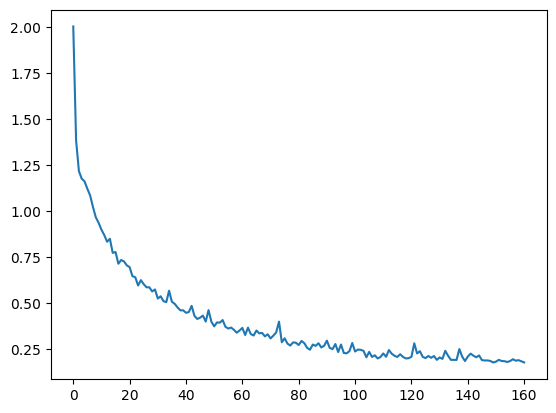


----------- Validação -----------
Acurácia: 0.9433962264150944


In [4]:
with open("validacoes_q2.csv", mode="r") as arquivo_csv:
    leitor_csv = csv.reader(arquivo_csv)
    matriz = list(leitor_csv)


nome_colunas = matriz[0]
df = pd.DataFrame(data = matriz[1:], columns = nome_colunas)
df['Indice'] = df['Indice'].astype(int)
df['Alfa'] = df['Alfa'].astype(float)
df['Qnt_nós'] = df['Qnt_nós'].astype(int)
df['Taxa aprendizado'] = df['Taxa aprendizado'].astype(float)
df['Momentum'] = df['Momentum'].astype(float)
df['Erro'] = df['Erro'].astype(float)
df_ordenado = df.sort_values(by='Erro')

print(df_ordenado.iloc[:,1:].head(10))
print()
melhor_hiperparametros = df_ordenado.iloc[0]
melhor_curva = historico_custo[ int(melhor_hiperparametros[0]) ]
n_it = len(melhor_curva)
x = range(n_it)
plt.plot(x, melhor_curva)
plt.show()
print()

_ , qnt_nos, ativacao, alfa, taxa_aprendizado, momentum_, _ = melhor_hiperparametros
model = MLPClassifier(hidden_layer_sizes=(qnt_nos,), activation=ativacao, alpha = alfa, solver='sgd', batch_size=6, learning_rate='constant', learning_rate_init= taxa_aprendizado, momentum=momentum_, random_state=42)
model.fit(X_treino, y_treino)
y_pred = model.predict(X_val)
print("----------- Validação -----------")
acuracia = accuracy_score(y_val, y_pred)
print("Acurácia:", acuracia)

# Questão 2 | Treinamento e Teste

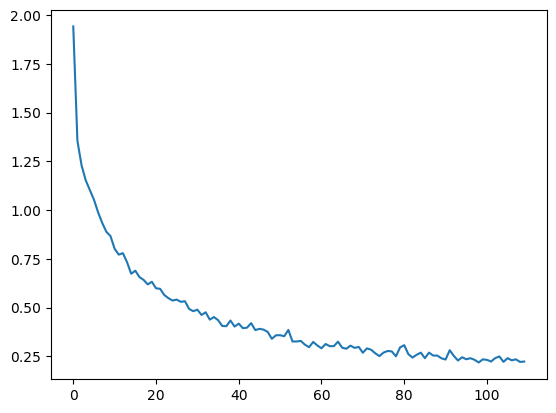


Acurácia: 0.9848484848484849
Acurácia: 0.9191919191919192


In [5]:
X_treinoval = np.concatenate((X_treino, X_val), axis=0)
y_treinoval = np.concatenate((y_treino, y_val), axis=0)


model = MLPClassifier(hidden_layer_sizes=(qnt_nos,), activation=ativacao, alpha = alfa, solver='sgd', batch_size=6, learning_rate='constant', learning_rate_init= taxa_aprendizado, momentum=momentum_, random_state=42)
model.fit(X_treinoval, y_treinoval)
for tipo, x, y in [ ["Treino", X_treinoval, y_treinoval], ["Teste", X_teste, y_teste] ]:
  y_pred = model.predict(x)
  mse = mean_squared_error(y, y_pred)
  rmse = math.sqrt(mse)
  mae = mean_absolute_error(y, y_pred)
  mre = mre_c(y, y_pred)

  if tipo == "Treino":
    curva = model.loss_curve_
    n_it = len(curva)
    x = range(n_it)
    plt.plot(x, curva)
    plt.show()
    print()

  acuracia = accuracy_score(y, y_pred)
  print("Acurácia:", acuracia)